In [1]:
from IPython.display import clear_output
import time
try:

    !pip install h5py
    !pip install pandas
    !pip install Pillow
    !pip install matplotlib
    #!pip install sklearn
    !pip install tensorflow
    !pip install scikit-learn
    !pip install torch
    !pip install torchvision
    !pip install FCN
    time.sleep(5)
    clear_output()
    print("Packages successfully installed")

except:
    print("error installing packages")



Packages successfully installed


In [1]:
import h5py
import pandas as pd
import numpy as np
from PIL import Image
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
from torchsummary import summary
import cv2

In [2]:
#Brings in YOUR google drive directory, save data to google drive so that you
#dont have to download everytime
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [5]:
# This function from https://www.kaggle.com/competitions/isic-2024-challenge/discussion/519735
def remove_hair(image):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
        blackhat = cv2.morphologyEx(gray,cv2.MORPH_BLACKHAT,kernel)

        _, thresh = cv2.threshold(blackhat, 10 ,255, cv2.THRESH_BINARY)
        inpainted_image = cv2.inpaint(image, thresh, 1, cv2.INPAINT_TELEA)
        return inpainted_image

(767, 1022, 3)


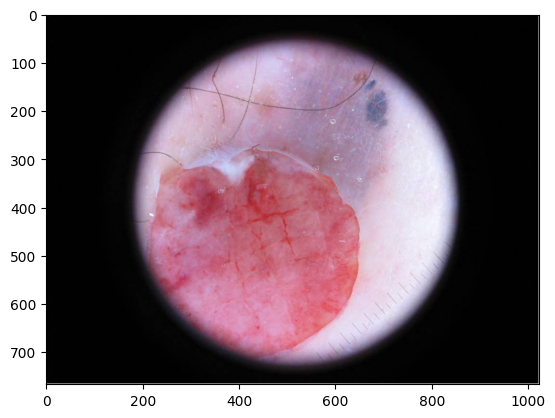

In [3]:
#test_images["ISIC_0015740"]
test_images_path = "/content/drive/MyDrive/cse151a-group-project/isic-2024-challenge/train-image/image/ISIC_3723665.jpg"
test_images_path2 = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2017/ISIC2017_Training_Data/ISIC_0000004.jpg"

test_image = cv2.imread(test_images_path2)
print(test_image.shape)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
plt.show()


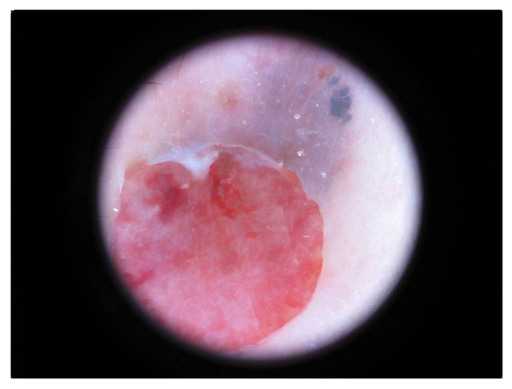

In [6]:
#plt.imshow(remove_hair(np.array(test_images["ISIC_0015740"])))
plt.imshow(remove_hair(np.array(test_image)))
plt.axis('off')
plt.show()

## Data Loading

In [7]:

#path to ISIC 2024 dataset on my google drive
#google_drive_path ="/content/drive/MyDrive/cse151a-group-project/isic-2024-challenge/train-image/image"
google_drive_path ="/content/drive/MyDrive/cse151a-group-project/isic-2024-challenge/train-metadata.csv"

isic_2020_path = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2020/ISIC2020_Training_labels.csv"

isic_2019_path = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2019/ISIC2019_Training_labels.csv"

isic_2018_path = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2018/ISIC2018_Training_labels.csv"

isic_2017_path = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2017/ISIC2017_Training_labels.csv"


isic_2016_path = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2016/ISBI2016_Training_labels.csv"

In [8]:
isic_2020 = pd.read_csv(isic_2020_path)
isic_2020 = isic_2020[['image_name','target']]
#isic_2020
print(isic_2020['target'].value_counts())

target_1_2020 = isic_2020[isic_2020['target']==1].sample(n=584,random_state=42)
target_1_2020.rename(columns={'image_name':'isic_id'},inplace=True)
display(target_1_2020.shape)
display(target_1_2020.head())

target
0    32542
1      584
Name: count, dtype: int64


(584, 2)

,isic_id,target
22329,ISIC_6767569,1
24088,ISIC_7312977,1
5627,ISIC_1785627,1
26613,ISIC_8066110,1
29231,ISIC_8838753,1


In [9]:
isic_2019 = pd.read_csv(isic_2019_path)
isic_2019 = isic_2019[['image','MEL']]
#isic_2020
print(isic_2019['MEL'].value_counts())

target_1_2019 = isic_2019[isic_2019['MEL']==1].sample(n=4522,random_state=42)
target_1_2019.rename(columns={'image':'isic_id','MEL':'target'},inplace=True)
display(target_1_2019.shape)
display(target_1_2019.head())

MEL
0.0    20809
1.0     4522
Name: count, dtype: int64


(4522, 2)

,isic_id,target
22503,ISIC_0068778,1.0
15900,ISIC_0058285,1.0
25288,ISIC_0073194,1.0
15717,ISIC_0058003,1.0
23357,ISIC_0070105,1.0


In [10]:
isic_2018 = pd.read_csv(isic_2018_path)
isic_2018 = isic_2018[['image','MEL']]
#isic_2020
print(isic_2018['MEL'].value_counts())

target_1_2018 = isic_2018[isic_2018['MEL']==1].sample(n=1113,random_state=42)
target_1_2018.rename(columns={'image':'isic_id','MEL':'target'},inplace=True)
display(target_1_2018.shape)
display(target_1_2018.head())

MEL
0.0    8902
1.0    1113
Name: count, dtype: int64


(1113, 2)

,isic_id,target
8993,ISIC_0033299,1.0
1133,ISIC_0025439,1.0
9728,ISIC_0034034,1.0
8318,ISIC_0032624,1.0
3316,ISIC_0027622,1.0


In [11]:
isic_2017 = pd.read_csv(isic_2017_path)
isic_2017 = isic_2017[['image_id','melanoma']]
#isic_2020
print(isic_2017['melanoma'].value_counts())
print(isic_2017.shape)

target_1_2017 = isic_2017[isic_2017['melanoma']==1].sample(n=374,random_state=42)
target_1_2017.rename(columns={'image_id':'isic_id','melanoma':'target'},inplace=True)
display(target_1_2017.shape)
display(target_1_2017.head())

melanoma
0.0    1626
1.0     374
Name: count, dtype: int64
(2000, 2)


(374, 2)

,isic_id,target
1766,ISIC_0014360,1.0
140,ISIC_0000154,1.0
54,ISIC_0000056,1.0
1759,ISIC_0014331,1.0
242,ISIC_0000285,1.0


In [20]:
isic_2016 = pd.read_csv(isic_2016_path)
#isic_2016
isic_2016.columns = ["isic_id","target"]#isic_2016[['ISIC_0000000','melanoma']]
#isic_2016
#isic_2020
print(isic_2016['target'].value_counts())

isic_2016['target'] = isic_2016['target'].map({'malignant': 1, 'benign': 0})

target_1_2016 = isic_2016[isic_2016['target']==1].sample(n=173,random_state=42)
#target_1_2017.rename(columns={'image_id':'isic_id','melanoma':'target'},inplace=True)

display(target_1_2016.shape)
display(target_1_2016.head())

target
benign       726
malignant    173
Name: count, dtype: int64


(173, 2)

,isic_id,target
832,ISIC_0011210,1
185,ISIC_0000281,1
362,ISIC_0001134,1
256,ISIC_0000395,1
622,ISIC_0010194,1


In [12]:
metadata = pd.read_csv(google_drive_path)
metadata = metadata[['isic_id', 'target']]

<ipython-input-12-bac97242d0f8>:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv(google_drive_path)


In [13]:
print(metadata['target'].value_counts())

target
0    400666
1       393
Name: count, dtype: int64


In [29]:
# Load metadata
#metadata = pd.read_csv('isic-2024-challenge/train-metadata.csv')


# Ensure an even split of target=0 and target=1
target_0 = metadata[metadata['target'] == 0].sample(n=10000, random_state=42)
target_1 = metadata[metadata['target'] == 1].sample(n=393, random_state=42)

#balanced_metadata = pd.concat([target_0, target_1,target_1_2017,
                               #target_1_2018,target_1_2019,target_1_2020,
                               #target_1_2016]).reset_index(drop=True)

balanced_metadata = pd.concat([target_0, target_1]).reset_index(drop=True)
# Split the metadata into training and validation sets
train_metadata, val_metadata = train_test_split(balanced_metadata, test_size=0.2, random_state=42)


In [30]:
print(balanced_metadata['target'].value_counts())
print(train_metadata.shape)
#print(balanced_metadata['melanoma'].value_counts())
#print(type(train_metadata))
print(train_metadata['target'].value_counts())
print(val_metadata['target'].value_counts())
train_metadata.describe()

target
0    10000
1      393
Name: count, dtype: int64
(8314, 2)
target
0    8009
1     305
Name: count, dtype: int64
target
0    1991
1      88
Name: count, dtype: int64


,target
count,8314.000000
mean,0.036685
std,0.187999
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## Pre-Processing

Standaring

In [35]:
from torch.utils.data import DataLoader, ConcatDataset

In [24]:
#for ISIC 2024 hpf5 files
# Define the custom dataset class
class ISIC2024Dataset(Dataset):
    def __init__(self, metadata: pd.DataFrame, file_hdf: str, transform=None):
        self.metadata = metadata
        self.fp_hdf = h5py.File(file_hdf, mode="r")
        self.transform = transform

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, item):
        isic_row = self.metadata.iloc[item]
        isic_id = isic_row.isic_id
        image = np.array(Image.open(io.BytesIO(self.fp_hdf[isic_id][()])))
        label = isic_row.target

        if self.transform:
            image = self.transform(image)

        return image, label


In [44]:
class ISIC_Folder_Dataset(Dataset):
  def __init__(self, metadata: pd.DataFrame, folder_path,transform=None):
    self.metadata = metadata
    self.folder_path = str(folder_path)
    self.transform = transform

  def __len__(self):
    return len(self.metadata)

  def __getitem__(self,item):
    isic_row = self.metadata.iloc[item]
    isic_id = isic_row.isic_id
    label = isic_row.target
    image_path =f"{self.folder_path}/{isic_id}.jpg"
    image = np.array(Image.open(image_path))

    if self.transform:
      image = self.transform(image)

    return image, label



In [62]:
google_drive_train_image = "/content/drive/MyDrive/cse151a-group-project/isic-2024-challenge/train-image.hdf5"
google_drive_test_image = "/content/drive/MyDrive/cse151a-group-project/isic-2024-challenge/test-image.hdf5"

#paths are to TRAINING IMAGES FOLDERS
isic2016_folder = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2016/ISIC2016_Training_Data"
isic2019_folder = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2019/ISIC_2019_Training_Input"
isic2018_folder = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2018/ISIC2018_Training_Data"
isic2017_folder = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2017/ISIC2017_Training_Data"
isic2020_folder_train = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2020/ISIC2020_Training_Data"


In [63]:
# Define image transformations
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create dataset objects
#train_dataset = ISIC2024Dataset(train_metadata, 'isic-2024-challenge/train-image.hdf5', transform=transform)
#val_dataset = ISIC2024Dataset(val_metadata, 'isic-2024-challenge/train-image.hdf5', transform=transform)
train_dataset = ISIC2024Dataset(train_metadata, google_drive_train_image, transform=transform)
val_dataset = ISIC2024Dataset(val_metadata, google_drive_train_image, transform=transform)

#paths are to TRAINING FOLDER
train_dataset_2016 = ISIC_Folder_Dataset(target_1_2016, isic2016_folder, transform=transform)
train_dataset_2019 = ISIC_Folder_Dataset(target_1_2019, isic2019_folder, transform=transform)
val_dataset_2018 = ISIC_Folder_Dataset(target_1_2019,isic2018_folder,transform=transform)
train_dataset_2017 = ISIC_Folder_Dataset(target_1_2017, isic2017_folder, transform=transform)
train_dataset_2020 = ISIC_Folder_Dataset(target_1_2020, isic2020_folder_train, transform=transform)
#val_dataset_2016 = ISIC2024Dataset(val_metadata, google_drive_train_image, transform=transform)

#print(type(train_dataset))


In [65]:
# Create data loaders

#isic2016_train_loader = DataLoader(train_dataset_2016,batch_size=32,shuffle=True,num_workers=0)

concat_train = ConcatDataset([train_dataset,train_dataset_2016,train_dataset_2020,
                              train_dataset_2019,train_dataset_2017])

#train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
train_loader = DataLoader(concat_train, batch_size=32, shuffle=True, num_workers=0)

concat_val = ConcatDataset([val_dataset,val_dataset_2018])
#val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)
val_loader = DataLoader(concat_val, batch_size=32, shuffle=False, num_workers=0)

print(type(train_loader))
print(len(train_loader))
print(len(val_loader))

<class 'torch.utils.data.dataloader.DataLoader'>
437
207


## ResNet18

In [41]:
# Define the model
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 1)  # Binary classification

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
summary(model,input_size=(3,224,224))


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 151MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [42]:
# Training loop
num_epochs = 10

epoch_losses_train = []
epoch_accuracy_train = []
epoch_losses_test=[]
epoch_accuracy_test=[]


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device).float()

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs.squeeze(), labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

        # Calculate accuracy
        predicted = (torch.sigmoid(outputs.squeeze()) > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total
    epoch_losses_train.append(epoch_loss)
    epoch_accuracy_train.append(epoch_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')


    # Evaluation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0



    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).float()

            outputs = model(images)
            loss = criterion(outputs.squeeze(), labels)

            val_loss += loss.item() * images.size(0)

            predicted = (torch.sigmoid(outputs.squeeze()) > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader.dataset)
    accuracy = correct / total
    epoch_losses_test.append(val_loss)
    epoch_accuracy_test.append(accuracy)
    print(f'Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}')


Epoch [1/10], Loss: 0.1871, Accuracy: 0.9407
Validation Loss: 0.1787, Accuracy: 0.9577


KeyboardInterrupt: 

In [ ]:
# Evaluation loop
#moved to above loop
model.eval()
val_loss = 0.0
correct = 0
total = 0



with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device).float()

        outputs = model(images)
        loss = criterion(outputs.squeeze(), labels)

        val_loss += loss.item() * images.size(0)

        predicted = (torch.sigmoid(outputs.squeeze()) > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

val_loss = val_loss / len(val_loader.dataset)
accuracy = correct / total
print(f'Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}')


Validation Loss: 0.1176, Accuracy: 0.9582


In [ ]:
metadata['target'].value_counts()

target
0    400666
1       393
Name: count, dtype: int64

In [ ]:
print(len(epoch_losses_train))
print(len(epoch_losses_accuracy))

10
10


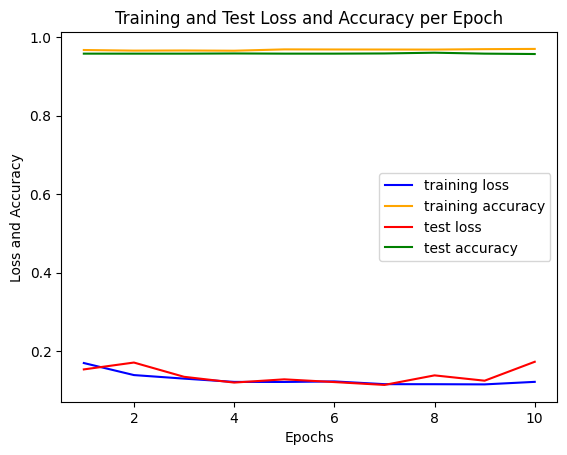

In [ ]:
plt.plot(range(1,len(epoch_losses_train)+1),epoch_losses_train,
         label='training loss',color='blue')
plt.plot(range(1,len(epoch_losses_accuracy)+1),epoch_losses_accuracy,
         label='training accuracy',color='orange')

plt.plot(range(1,len(epoch_losses_test)+1),epoch_losses_test,
         label='test loss',color='red')

plt.plot(range(1,len(epoch_accuracy_test)+1),epoch_accuracy_test,
         label='test accuracy',color='green')

plt.title("Training and Test Loss and Accuracy per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss and Accuracy")
plt.legend()
plt.show()

##FCN8 Implementation

In [ ]:
import torch.nn as nn

class FCN8s(nn.Module):

    def __init__(self, n_class=12):
        super(FCN8s, self).__init__()

        ################################################################################
        # TODO: Implement the layers for FCN8s.                                        #
        ################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        self.conv1_1 = nn.Conv2d(3,64,3,padding=100,stride=1)
        self.relu1_1 = nn.ReLU(inplace=True)
        self.conv1_2 = nn.Conv2d(64,64,3,padding=1,stride=1)
        self.relu1_2 = nn.ReLU(inplace=True)
        self.pool1 = nn.MaxPool2d(2,ceil_mode=True)

        self.conv2_1 = nn.Conv2d(64,128,3,padding=1,stride=1)
        self.relu2_1 = nn.ReLU(inplace=True)
        self.conv2_2 = nn.Conv2d(128,128,3,padding=1,stride=1)
        self.relu2_2 = nn.ReLU(inplace=True)
        self.pool2 = nn.MaxPool2d(2,ceil_mode=True)

        self.conv3_1 = nn.Conv2d(128,256,3,padding=1,stride=1)
        self.relu3_1 = nn.ReLU(inplace=True)
        self.conv3_2 = nn.Conv2d(256,256,3,padding=1,stride=1)
        self.relu3_2 = nn.ReLU(inplace=True)
        self.conv3_3 = nn.Conv2d(256,256,3,padding=1,stride=1)
        self.relu3_3 = nn.ReLU(inplace=True)
        self.pool3 = nn.MaxPool2d(2,ceil_mode=True)

        self.conv4_1 = nn.Conv2d(256,512,3,padding=1,stride=1)
        self.relu4_1 = nn.ReLU(inplace=True)
        self.conv4_2 = nn.Conv2d(512,512,3,padding=1,stride=1)
        self.relu4_2 = nn.ReLU(inplace=True)
        self.conv4_3 = nn.Conv2d(512,512,3,padding=1,stride=1)
        self.relu4_3 = nn.ReLU(inplace=True)
        self.pool4 = nn.MaxPool2d(2,ceil_mode=True)

        self.conv5_1 = nn.Conv2d(512,512,3,padding=1,stride=1)
        self.relu5_1 = nn.ReLU(inplace=True)
        self.conv5_2 = nn.Conv2d(512,512,3,padding=1,stride=1)
        self.relu5_2 = nn.ReLU(inplace=True)
        self.conv5_3 = nn.Conv2d(512,512,3,padding=1,stride=1)
        self.relu5_3 = nn.ReLU(inplace=True)
        self.pool5 = nn.MaxPool2d(2,ceil_mode=True)

        self.fc6 = nn.Conv2d(512,4096,7,stride=1,padding=0)
        self.relufc6 = nn.ReLU(inplace=True)
        self.dropoutfc6 = nn.Dropout2d(p=0.5)

        self.fc7 = nn.Conv2d(4096,4096,1,stride=1,padding=0)
        self.relufc7 = nn.ReLU(inplace=True)
        self.dropoutfc7 = nn.Dropout2d(p=0.5)


        self.score = nn.Conv2d(4096,n_class,1,stride=1,padding=0)

        #self.trans_conv = nn.ConvTranspose2d(n_class,n_class,64,stride=32,padding=0,bias=False)

        self.score_pool_3 = nn.Conv2d(256,n_class,1,stride=1,padding=0)

        self.score_pool_4 = nn.Conv2d(512,n_class,1,stride=1,padding=0)

        self.upscore1 = nn.ConvTranspose2d(n_class,n_class,4,stride=2,bias=False)

        self.upscore2 = nn.ConvTranspose2d(n_class,n_class,4,stride=2,bias=False)

        self.upscore3 = nn.ConvTranspose2d(n_class,n_class,16,stride=8,bias=False)




        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################

        self._initialize_weights()

    def get_upsampling_weight(self, in_channels, out_channels, kernel_size):
        """Make a 2D bilinear kernel suitable for upsampling"""
        factor = (kernel_size + 1) // 2
        if kernel_size % 2 == 1:
            center = factor - 1
        else:
            center = factor - 0.5
        og = np.ogrid[:kernel_size, :kernel_size]
        filt = (1 - abs(og[0] - center) / factor) * \
               (1 - abs(og[1] - center) / factor)
        weight = np.zeros((in_channels, out_channels, kernel_size, kernel_size),
                          dtype=np.float64)
        weight[range(in_channels), range(out_channels), :, :] = filt
        return torch.from_numpy(weight).float()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                m.weight.data.zero_()
                if m.bias is not None:
                    m.bias.data.zero_()
            if isinstance(m, nn.ConvTranspose2d):
                assert m.kernel_size[0] == m.kernel_size[1]
                initial_weight = self.get_upsampling_weight(
                    m.in_channels, m.out_channels, m.kernel_size[0])
                m.weight.data.copy_(initial_weight)


    def forward(self, x):
        ################################################################################
        # TODO: Implement the forward pass for FCN8s.                                 #
        ################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        input_shape = x.shape

        x = self.conv1_1(x)
        x = self.relu1_1(x)
        x = self.conv1_2(x)
        x = self.relu1_2(x)
        x = self.pool1(x)

        x = self.conv2_1(x)
        x = self.relu2_1(x)
        x = self.conv2_2(x)
        x = self.relu2_2(x)
        x = self.pool2(x)

        x = self.conv3_1(x)
        x = self.relu3_1(x)
        x = self.conv3_2(x)
        x = self.relu3_2(x)
        x = self.conv3_3(x)
        x = self.relu3_3(x)
        pool3 = self.pool3(x)

        x = self.conv4_1(pool3)
        x = self.relu4_1(x)
        x = self.conv4_2(x)
        x = self.relu4_2(x)
        x = self.conv4_3(x)
        x = self.relu4_3(x)
        pool4 = self.pool4(x)

        x = self.conv5_1(pool4)
        x = self.relu5_1(x)
        x = self.conv5_2(x)
        x = self.relu5_2(x)
        x = self.conv5_3(x)
        x = self.relu5_3(x)
        x = self.pool5(x)

        x = self.fc6(x)
        x = self.relufc6(x)
        x = self.dropoutfc6(x)

        x = self.fc7(x)
        x = self.relufc7(x)
        x = self.dropoutfc7(x)

        x = self.score(x)

        upscore_1 = self.upscore1(x)

        score_pool4 = self.score_pool_4(pool4)
        score_pool4 = score_pool4[:,:,5:5+upscore_1.size()[2],5:5+upscore_1.size()[3]]

        upscore_2 = self.upscore2(score_pool4+upscore_1)

        score_pool3 = self.score_pool_3(pool3)
        score_pool3 = score_pool3[:,:,9:9+upscore_2.size()[2],9:9+upscore_2.size()[3]]

        upscore_3 = self.upscore3(score_pool3+upscore_2)
        upscore_3 = upscore_3[:,:,31:31+input_shape[2],31:31+input_shape[3]]

        h=upscore_3

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################

        return h

    def copy_params_from_vgg16(self, vgg16):
        features = [
            self.conv1_1, self.relu1_1,
            self.conv1_2, self.relu1_2,
            self.pool1,
            self.conv2_1, self.relu2_1,
            self.conv2_2, self.relu2_2,
            self.pool2,
            self.conv3_1, self.relu3_1,
            self.conv3_2, self.relu3_2,
            self.conv3_3, self.relu3_3,
            self.pool3,
            self.conv4_1, self.relu4_1,
            self.conv4_2, self.relu4_2,
            self.conv4_3, self.relu4_3,
            self.pool4,
            self.conv5_1, self.relu5_1,
            self.conv5_2, self.relu5_2,
            self.conv5_3, self.relu5_3,
            self.pool5,
        ]
        for l1, l2 in zip(vgg16.features, features):
            if isinstance(l1, nn.Conv2d) and isinstance(l2, nn.Conv2d):
                assert l1.weight.size() == l2.weight.size()
                assert l1.bias.size() == l2.bias.size()
                l2.weight.data.copy_(l1.weight.data)
                l2.bias.data.copy_(l1.bias.data)
        for i, name in zip([0, 3], ['fc6', 'fc7']):
            l1 = vgg16.classifier[i]
            l2 = getattr(self, name)
            l2.weight.data.copy_(l1.weight.data.view(l2.weight.size()))
            l2.bias.data.copy_(l1.bias.data.view(l2.bias.size()))


In [ ]:
USE_GPU = True
if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
#print_every = 100

print('using device:', device)

using device: cuda


In [ ]:
import fcn
from fcn.trainer import Trainer
import torchvision

#vgg16 = torchvision.models.vgg16(pretrained=True)

model8 = FCN8s(n_class=2)
#model8.copy_params_from_vgg16(vgg16)
model8.to(device)

yhat_fcn8= []

'''
best_model_fcn8s = Trainer(
    model8,
    train_loader,
    val_loader,
    iter_train=10,
    iter_valid=10,
    out=yhat_fcn8,
    max_iter=20
)'''
best_model = Trainer(
    model8,
    train_loader,
    val_loader
    #test_loader,

)

#best_model_fcn8s

TypeError: Trainer.__init__() missing 4 required positional arguments: 'iter_train', 'iter_valid', 'out', and 'max_iter'

In [ ]:
from FCN.trainer import visualize
visualize(best_model_fcn8s, test_loader)